<a href="https://colab.research.google.com/github/kwanda2426/load-shortfall-regression-predict-api-template/blob/master/latest_note_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forcasting Load shoadfall for Spain

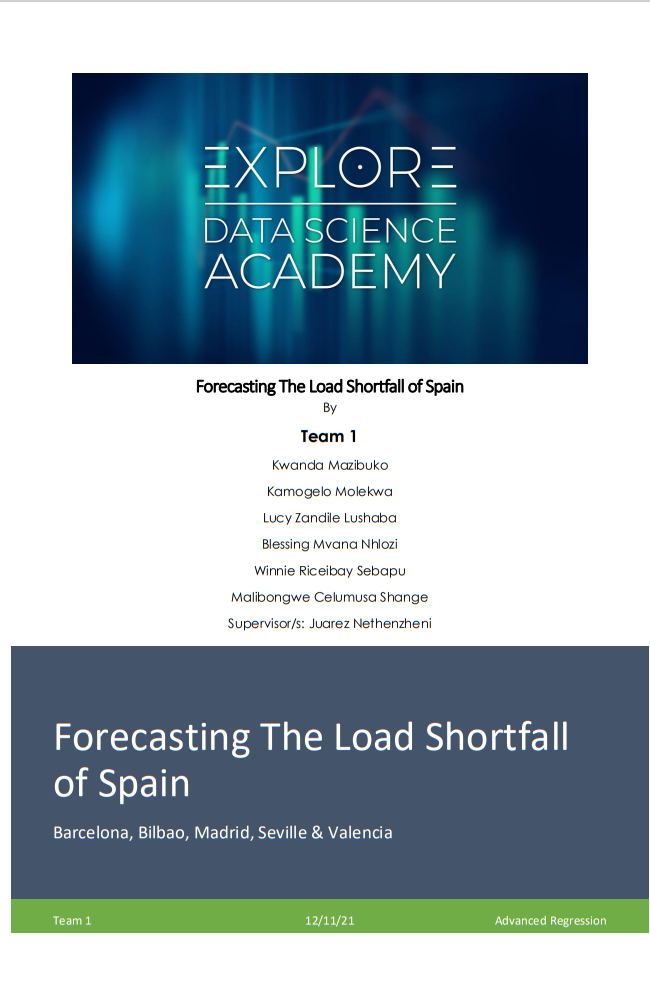

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Team Meambers</a>

<a href=#one>2. Introduction</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Loading Data</a>

<a href=#three>4. Data Processing</a>

<a href=#four>5. Exploratory Data Analysis (EDA)</a>

<a href=#four>6. Data Engineering</a>

<a href=#five>7. Feature Selection</a>

<a href=#six>8. Model Training</a>

<a href=#seven>9. Model's Predictive Accuracy Assessment</a>

#### [Team Meambers](kwanda2426/load-shortfall-regression-predict-api-template)
- [Blessing Mvana Nhlozi](https://www.linkedin.com/in/blessingmvananhlozi/)
- [Malibongwe Celumusa Shange](https://www.linkedin.com/in/malibongwe-shange-072984168/)
- [Winnie Sebapu](https://www.linkedin.com/in/winnie-sebapu-231bb891/)
- Kwanda Mazibuko
- [Lucy Zandile Lushaba](https://www.linkedin.com/in/lucy-zandile-lushaba-b065b2122/)
- Kamogelo Molekwa

# Introduction
- Renewable energy is energy that has been derived from earth’s natural resources that are not finite or exhaustible, such as wind and sunlight. Renewable energy is an alternative to the traditional energy that relies on fossil fuels, and it tends to be much  less harmful to the environment.
- Solar energy is derived by capturing radiant energy from sunlight and converting it into heat, electricity, or hot water. Photovoltaic (PV) systems can convert direct sunlight into electricity through the use of solar cells.
- One of the benefits of solar energy is that sunlight is functionally endless. With the technology to harvest it, there is a limitless supply of solar energy, meaning it could render fossil fuels obsolete. Relying on solar energy rather than fossil fuels also helps us improve public health and environmental conditions. In the long term, solar energy could also eliminate energy costs, and in the short term, reduce your energy bills. Many federal local, state, and federal governments also incentivize the investment in solar energy by providing rebates or tax credits.
- Although solar energy will save you money in the long run, it tends to be a significant upfront cost and is an unrealistic expenses for most households. For personal homes, homeowners also need to have the ample sunlight and space to arrange their solar panels, which limits who can realistically adopt this technology at the individual level.
- Wind farms capture the energy of wind flow by using turbines and converting it into electricity. There are several forms of systems used to convert wind energy and each vary. Commercial grade wind-powered generating systems can power many different organizations, while single-wind turbines are used to help supplement pre-existing energy organizations.

## Problem Statement

There has been evidence that the use of purely non-renewable sources is not sustainable. Nonrenewable energy sources are mainly composed of carbon elements. These energy sources include coal, petroleum, and natural gas. The reason why these energy sources are considered unsustainable is that there is only a finite supply.  The government of Spain is considering an expansion of its renewable energy resource infrastructure investments. Renewable energy is a type of energy production that comes from sources like wind and water that naturally replenish themselves. For renewable energy sources like hydropower, wind energy, and solar energy, production can remain constant as long as these resources are available, which is essentially guaranteed. A sustainable energy source can be maintained for the indefinite future without compromising or threatening future generations. As sustainability relies on substituting harmful energy production processes with environmentally-friendly ones, most renewable energy sources are considered sustainable based on their ability to generate clean, reliable energy for the future.

In [ ]:

# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
import statistics

#ignoring warnings
import warnings
warnings.simplefilter(action='ignore')

# datetime
import datetime

# Libraries for data preparation and model building
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
# saving my model
import pickle

# Loading the Data

In [ ]:
#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
#reading the data from the csv

df_train = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/load-shortfall-regression-predict-api-template/master/Notebook/df_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/load-shortfall-regression-predict-api-template/master/Notebook/df_test.csv')
test_df = df_test.copy()
train_df = df_train.copy()



# Data Processing

It is a good idea to concatenate the train and test data to ensure that any changes are consistent across the train and test data.

In [ ]:
# Combining the train and test data sets

df_concat = pd.concat([train_df, test_df])


In [ ]:
# Checking the shape of the new data frame

df_concat.shape

(11683, 49)

In [ ]:
#Show the first five rows of the dataset
cols=[i for i in df_concat.columns if i != 'time']
cols=sorted(cols)
cols=['time']+ cols
df_concat= df_concat[cols]
df_concat.head()

,time,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Unnamed: 0,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
0,2015-01-01 03:00:00,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,800.0,42.666667,6.333333,0.0,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,800.0,223.333333,1.000000,0.0,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,800.0,0.666667,0.0,74.333333,sp25,0.0,0.0,274.254667,274.254667,274.254667,800.0,3.333333,0,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,level_5,0.666667,6715.666667
1,2015-01-01 06:00:00,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,800.0,139.000000,4.000000,0.0,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,800.0,221.000000,1.000000,0.0,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,800.0,0.333333,0.0,78.333333,sp25,0.0,0.0,274.945000,274.945000,274.945000,800.0,3.333333,1,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,level_10,1.666667,4171.666667
2,2015-01-01 09:00:00,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,800.0,326.000000,2.000000,0.0,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,800.0,214.333333,1.000000,0.0,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,800.0,1.000000,0.0,71.333333,sp25,0.0,0.0,278.792000,278.792000,278.792000,800.0,2.666667,2,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,level_9,1.000000,4274.666667
3,2015-01-01 12:00:00,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,800.0,273.000000,2.333333,0.0,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,800.0,199.666667,1.000000,0.0,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,800.0,1.000000,0.0,65.333333,sp25,0.0,0.0,285.394000,285.394000,285.394000,800.0,4.000000,3,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,level_8,1.000000,5075.666667
4,2015-01-01 15:00:00,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,800.0,260.000000,4.333333,2.0,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,800.0,185.000000,0.333333,0.0,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,800.0,1.000000,0.0,59.000000,sp25,0.0,0.0,285.513719,285.513719,285.513719,800.0,3.000000,4,58.333333,NaN,0.0,283.015115,283.015115,283.015115,level_7,1.000000,6620.666667


In [ ]:
df_concat.describe()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Unnamed: 0,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,load_shortfall_3h
count,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,9161.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,1.287326e+03,0.108534,0.000331,289.869413,291.042128,288.616766,764.603446,187.654241,2.782419,43.440712,1017.482011,0.118698,0.023936,286.447784,288.095397,284.993657,727.800750,159.878855,1.958629,20.668692,58.721818,1011.797412,0.043328,288.282055,289.377372,287.056222,769.851665,2.433750,14.155268,63.774687,0.041120,0.000182,293.170948,296.007363,291.263219,774.050843,2.483067,5841.000000,65.091814,1012.346687,0.000154,290.788513,291.362722,290.229939,2.692873,10673.857612
std,1.218906e+04,0.556794,0.003466,6.680538,7.236360,6.391989,90.736191,88.694717,1.758587,32.046215,9.753552,0.334918,0.482817,6.738466,6.898601,6.730076,113.616789,101.005654,1.696043,28.478087,24.390621,19.983122,0.163996,9.258559,9.594562,9.093455,81.914258,1.831762,24.541321,22.219380,0.180425,0.003171,7.998774,8.929160,8.136234,72.909418,1.705508,3372.735932,19.040927,8.817473,0.010277,7.157835,7.441278,7.003619,2.321759,5218.046404
min,6.706667e+02,0.000000,0.000000,270.816667,272.150000,269.483333,200.666667,0.000000,0.000000,0.000000,971.333333,0.000000,0.000000,267.483333,269.063000,264.483333,207.333333,0.000000,0.000000,0.000000,6.333333,927.666667,0.000000,264.983333,264.983333,264.983333,211.000000,0.000000,0.000000,8.333333,0.000000,0.000000,272.063000,272.063000,270.150000,200.000000,0.000000,0.000000,10.333333,972.666667,0.000000,269.888000,269.888000,269.888000,0.000000,-6618.000000
25%,1.013667e+03,0.000000,0.000000,284.816667,285.338609,284.150000,800.000000,116.666667,1.333333,12.000000,1013.333333,0.000000,0.000000,281.483448,283.150000,280.122526,701.000000,76.666667,1.000000,0.000000,38.000000,1012.666667,0.000000,281.250000,282.150000,280.150000,800.000000,1.000000,0.000000,46.333333,0.000000,0.000000,287.403167,289.483333,285.483333,800.000000,1.000000,2920.500000,51.333333,1010.666667,0.000000,285.395500,285.783333,284.928833,1.000000,7390.333333
50%,1.017333e+03,0.000000,0.000000,289.426667,290.150000,288.276333,800.000000,193.333333,2.333333,45.000000,1018.666667,0.000000,0.000000,286.193333,287.816667,284.816667,800.000000,145.666667,1.333333,0.000000,59.333333,1017.333333,0.000000,286.923333,287.843333,285.816667,800.000000,2.000000,0.000000,67.000000,0.000000,0.000000,292.470000,295.483333,290.382000,800.000000,2.000000,5841.000000,66.333333,1015.000000,0.000000,290.483333,291.150000,289.820000,2.000000,11114.666667
75%,1.021167e+03,0.000000,0.000000,295.150000,296.816667,293.483333,801.000000,260.000000,3.666667,75.000000,1023.333333,0.100000,0.000000,291.040000,292.483333,289.816667,801.666667,233.333333,2.666667,38.333333,80.000000,1021.666667,0.000000,294.993

* #### Check for Missing Values



This is done so that we may know whether to remove the column or to impute data.

In [ ]:
# checking for the percentage of missing data

round((df_concat.isnull().sum()/df_concat.shape[0])
      *100,2).astype(str)+ ' %'

time                      0.0 %
Barcelona_pressure        0.0 %
Barcelona_rain_1h         0.0 %
Barcelona_rain_3h         0.0 %
Barcelona_temp            0.0 %
Barcelona_temp_max        0.0 %
Barcelona_temp_min        0.0 %
Barcelona_weather_id      0.0 %
Barcelona_wind_deg        0.0 %
Barcelona_wind_speed      0.0 %
Bilbao_clouds_all         0.0 %
Bilbao_pressure           0.0 %
Bilbao_rain_1h            0.0 %
Bilbao_snow_3h            0.0 %
Bilbao_temp               0.0 %
Bilbao_temp_max           0.0 %
Bilbao_temp_min           0.0 %
Bilbao_weather_id         0.0 %
Bilbao_wind_deg           0.0 %
Bilbao_wind_speed         0.0 %
Madrid_clouds_all         0.0 %
Madrid_humidity           0.0 %
Madrid_pressure           0.0 %
Madrid_rain_1h            0.0 %
Madrid_temp               0.0 %
Madrid_temp_max           0.0 %
Madrid_temp_min           0.0 %
Madrid_weather_id         0.0 %
Madrid_wind_speed         0.0 %
Seville_clouds_all        0.0 %
Seville_humidity          0.0 %
Seville_

#### Key Findings:
* The feature ‘Valencia_pressure’ has 21.59% missing which can be imputed.
* ‘load_shortfall_3h’ has 24.99% missing data, but this is the part of test data that was concatenated which is not necessarily needed.

In [ ]:
# Impute missing values for Valencia_pressure with mode

df_concat['Valencia_pressure'].fillna(statistics.mode(df_concat['Valencia_pressure'])
                                   , inplace = True)

The missing values for pressure were imputed using the mode because, naturally pressure does not vary by a significant quantity. 

* #### Checking that there are no missing values on columns other than load_shortfall_3h

In [ ]:
# checking for the percentage of missing data

round((df_concat.isnull().sum()/df_concat.shape[0])
      *100,2).astype(str)+ ' %'

time                      0.0 %
Barcelona_pressure        0.0 %
Barcelona_rain_1h         0.0 %
Barcelona_rain_3h         0.0 %
Barcelona_temp            0.0 %
Barcelona_temp_max        0.0 %
Barcelona_temp_min        0.0 %
Barcelona_weather_id      0.0 %
Barcelona_wind_deg        0.0 %
Barcelona_wind_speed      0.0 %
Bilbao_clouds_all         0.0 %
Bilbao_pressure           0.0 %
Bilbao_rain_1h            0.0 %
Bilbao_snow_3h            0.0 %
Bilbao_temp               0.0 %
Bilbao_temp_max           0.0 %
Bilbao_temp_min           0.0 %
Bilbao_weather_id         0.0 %
Bilbao_wind_deg           0.0 %
Bilbao_wind_speed         0.0 %
Madrid_clouds_all         0.0 %
Madrid_humidity           0.0 %
Madrid_pressure           0.0 %
Madrid_rain_1h            0.0 %
Madrid_temp               0.0 %
Madrid_temp_max           0.0 %
Madrid_temp_min           0.0 %
Madrid_weather_id         0.0 %
Madrid_wind_speed         0.0 %
Seville_clouds_all        0.0 %
Seville_humidity          0.0 %
Seville_

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Barcelona_pressure    11683 non-null  float64
 2   Barcelona_rain_1h     11683 non-null  float64
 3   Barcelona_rain_3h     11683 non-null  float64
 4   Barcelona_temp        11683 non-null  float64
 5   Barcelona_temp_max    11683 non-null  float64
 6   Barcelona_temp_min    11683 non-null  float64
 7   Barcelona_weather_id  11683 non-null  float64
 8   Barcelona_wind_deg    11683 non-null  float64
 9   Barcelona_wind_speed  11683 non-null  float64
 10  Bilbao_clouds_all     11683 non-null  float64
 11  Bilbao_pressure       11683 non-null  float64
 12  Bilbao_rain_1h        11683 non-null  float64
 13  Bilbao_snow_3h        11683 non-null  float64
 14  Bilbao_temp           11683 non-null  float64
 15  Bilbao_temp_max     

#### Key Findings:

* Indeed only ‘load_shortfall_3h’ reflects 24.99% of missing data, which is what we expected as shown by Non-Null Count.

* #### Deleting irrelevant column(s)

They need to be removed because they have no relavancy to our data set as they are not included in the information supplied.

In [ ]:
# Dropping the 'Unnamed: 0' column

df_concat.drop(['Unnamed: 0'], inplace = True, axis = 1)



*   Creating a copy of our data set



We create a copy of the data set to make sure that we don't lose our original data set.


In [ ]:
df_cleaned = df_concat.copy() # creating a copy of the data frame



# Exploratory Data Analysis (EDA)

Plotting Load Shortfall 3h time series to Visulise Load Shortfall with respect to time

In [ ]:
plt.figure(figsize=(14,6))
x_training['time'] = pd.to_datetime(x_training['time'])
plt.plot(x_training.time, y, label='Train', alpha=0.6, color='yellow')
plt.xlabel('Date', {'size': 30})
plt.ylabel('Load Shortfall 3h', {'size': 30})
plt.title('Spain Electrical Load Shortfall Visualisation', {'size': 30})
plt.legend(fontsize=20,facecolor='white')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ffb178d7cb0> (for post_execute):


KeyError: ignored

KeyError: ignored

<Figure size 1008x432 with 1 Axes>

Creating 100 interval Load Shortfall; and the plot its time series graph in order to reduce noise have a clear insight of it sequence

In [ ]:
load_Shortfall_rm = df_train.load_shortfall_3h.rolling(window=100).mean()

Plotting a 100 interval rolling Load Shortfall 3h 

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df_train.time, load_Shortfall_rm, label='Train', alpha=0.6, color='red')
plt.xlabel('Date', {'size': 30})
plt.ylabel('Load Shortfall 3h Rolling Mean', {'size': 30})
plt.title('Spain Electrical Load Shortfall Visualisation', {'size': 30})
plt.legend(fontsize=20,facecolor='white')

NameError: ignored

<Figure size 1008x432 with 0 Axes>

In [ ]:
corr_df = df_cleaned[:len(df_train)]

In [ ]:
corr_df.corr()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,load_shortfall_3h
Barcelona_pressure,1.000000,0.053550,-0.002796,-0.033221,-0.034412,-0.029612,-0.013790,-0.001079,0.001280,0.037506,-0.014092,0.052458,-0.001539,-0.027410,-0.031854,-0.022514,-0.048567,0.034220,0.009572,0.010833,0.025198,-0.091181,-0.003937,-0.017886,-0.015984,-0.017819,0.004365,0.011134,0.020264,0.021599,0.003875,-0.001685,-0.041542,-0.047179,-0.032889,-0.014359,-0.008853,-0.003012,-0.010918,-0.000473,-0.028260,-0.029292,-0.026596,0.050282,-0.034385
Barcelona_rain_1h,0.053550,1.000000,-0.020084,0.060384,0.083288,0.023582,-0.525751,-0.037854,0.042136,0.052913,-0.055521,0.052558,0.067461,0.034889,0.032362,0.031765,-0.051911,0.026187,-0.026640,0.008570,-0.061265,-0.016906,0.065321,0.075013,0.079558,0.070146,-0.038090,0.062758,0.003590,-0.051022,0.050899,-0.012500,0.069337,0.064457,0.065312,-0.007767,0.074540,0.009027,-0.015675,0.042576,0.045358,0.068789,0.015905,0.031804,-0.056633
Barcelona_rain_3h,-0.002796,-0.020084,1.000000,-0.042970,-0.051365,-0.029398,0.026554,-0.011875,-0.001722,-0.041013,0.025215,-0.001412,0.002985,-0.043223,-0.059089,-0.027060,-0.002715,0.007202,-0.038246,-0.000355,0.017797,0.036706,0.018953,-0.039565,-0.046967,-0.029094,-0.006607,-0.014644,0.029194,0.015555,0.007454,0.145740,-0.039126,-0.070069,-0.012016,-0.017497,-0.019804,0.002920,0.036046,-0.001905,-0.058942,-0.061068,-0.055676,-0.037553,-0.024720
Barcelona_temp,-0.033221,0.060384,-0.042970,1.000000,0.974480,0.964089,0.029239,-0.189016,0.116240,-0.023171,-0.229760,-0.138901,-0.086561,0.865705,0.831470,0.867434,0.128188,0.068701,0.018967,-0.223940,-0.684867,0.010542,-0.054825,0.903143,0.900428,0.868222,0.085587,0.080133,-0.186463,-0.617797,-0.098982,-0.041804,0.852651,0.693193,0.873170,0.168608,0.085395,-0.247168,-0.067210,-0.029135,0.914601,0.912094,0.892024,-0.021456,0.182673
Barcelona_temp_max,-0.034412,0.083288,-0.051365,0.974480,1.000000,0.885911,0.018332,-0.151302,0.114497,-0.034040,-0.217623,-0.157326,-0.087943,0.867268,0.844563,0.854620,0.146071,0.049775,0.011151,-0.242409,-0.691803,0.072290,-0.072734,0.896766,0.906248,0.847888,0.105912,0.061854,-0.205060,-0.606770,-0.110305,-0.049273,0.866389,0.738489,0.862597,0.176048,0.068902,-0.221430,-0.003821,-0.029249,0.901400,0.918256,0.860510,-0.040998,0.164734
Barcelona_temp_min,-0.029612,0.023582,-0.029398,0.964089,0.885911,1.000000,0.046167,-0.226583,0.109268,-0.010804,-0.230942,-0.106593,-0.079382,0.810785,0.764031,0.831224,0.098428,0.086482,0.023711,-0.188578,-0.636777,-0.068083,-0.028900,0.853881,0.836680,0.838985,0.056176,0.089992,-0.153412,-0.595065,-0.078631,-0.029569,0.779252,0.586923,0.831689,0.150195,0.097407,-0.266820,-0.140186,-0.027172,0.874447,0.845057,0.879687,0.001413,0.195984
Barcelona_weather_id,-0.013790,-0.525751,0.026554,0.029239,0.018332,0.046167,1.000000,0.151534,-0.048004,-0.124169,0.128763,-0.120618,-0.033598,0.053303,0.054720,0.053279,0.119813,-0.053839,-0.003074,-0.119970,-0.051139,0.031370,-0.144551,0.025671,0.027375,0.026252,0.137262,-0.099582,-0.099166,-0.050515,-0.159181,0.023488,0.014065,-0.000401,0.020735,0.123593,-0.056570,-0.096343,0.096241,-0.005456,0.031316,0.017432,0.046090,-0.037605,0.063868
Barcelona_wind_deg,-0.001079,-0.037854,-0.011875,-0.189016,-0.151302,-0.226583,0.151534,1.000000,0.076376,-0.065120,0.

## Data Engineering

#### Engineering new features from the 'time' feature

As shown by Spain Electrical Load Shortfall Visualisation the plot, time has a sine wave relationship with the load_shortfall_3h. These are separated into four, i.e year, month, day and hour features.

In [ ]:
# Changing 'time' date type from object to 'datetime64'

df_cleaned['time'] = pd.to_datetime(df_cleaned['time'])

# Creating new features

df_cleaned['year'] = df_cleaned['time'].dt.year # year feature

df_cleaned['month'] = df_cleaned['time'].dt.month # month feature

df_cleaned['day'] = df_cleaned['time'].dt.day # day

df_cleaned['hour'] = df_cleaned['time'].dt.hour #hour

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(df_cleaned.month, df_cleaned.load_shortfall_3h, alpha=0.6, color='yellow')
plt.xlabel('Date', {'size': 30})
plt.ylabel('Load Shortfall 3h', {'size': 30})
plt.title('Spain Electrical Load Shortfall Visualisation', {'size': 30})
plt.legend(fontsize=20,facecolor='white')

No handles with labels found to put in legend.


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ffb178d7cb0> (for post_execute):


KeyError: ignored

KeyError: ignored

<Figure size 1008x432 with 1 Axes>

#### Changing Categorical Data into Numeric data

All input data for regression model building purposes needs to be numerical.

In [ ]:
# Changing datatype to str for Valencia_wind_deg 
df_cleaned['Valencia_wind_deg'] = df_cleaned['Valencia_wind_deg'].astype('str')

# Changing datatype to from Seville_pressure

df_cleaned['Seville_pressure'] = df_cleaned['Seville_pressure'].astype('str')

# Extracting numbers from Valencia_wind_deg 

df_cleaned['Valencia_wind_deg'] = df_cleaned['Valencia_wind_deg'].str.extract('(\d+)')

#Changing Valencia_wind_deg data type from object to numeric

df_cleaned['Valencia_wind_deg'] = pd.to_numeric(df_cleaned['Valencia_wind_deg'])

#Extracting numbers from Seville_pressure
  
df_cleaned['Seville_pressure'] = df_cleaned['Seville_pressure'].str.extract('(\d+)')

#Changing Seville_pressure data type from object to numeric

df_cleaned['Seville_pressure'] = pd.to_numeric(df_cleaned['Seville_pressure'])

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  11683 non-null  datetime64[ns]
 1   Barcelona_pressure    11683 non-null  float64       
 2   Barcelona_rain_1h     11683 non-null  float64       
 3   Barcelona_rain_3h     11683 non-null  float64       
 4   Barcelona_temp        11683 non-null  float64       
 5   Barcelona_temp_max    11683 non-null  float64       
 6   Barcelona_temp_min    11683 non-null  float64       
 7   Barcelona_weather_id  11683 non-null  float64       
 8   Barcelona_wind_deg    11683 non-null  float64       
 9   Barcelona_wind_speed  11683 non-null  float64       
 10  Bilbao_clouds_all     11683 non-null  float64       
 11  Bilbao_pressure       11683 non-null  float64       
 12  Bilbao_rain_1h        11683 non-null  float64       
 13  Bilbao_snow_3h   

The average temperature, minimum and maximum temperature are highly correlated to one another, hence we can take the average of them.



```
# This is formatted as code
```

## Feature Selection

creating a function that will represnt this formula  $$\frac{Power}{Area}=\frac{Pv^3}{2T R_s}$$
where :
- $P$ =Air Pressure
-  $v$=windspeed
-  $T$=Air Temperature
-  $R_s$= the universal gas constant = 287 $J/kg·K$

In [ ]:
#def Power_per_Area(T,P,v):
#    return (P*100*v**3)/(2*T*287)

In [ ]:
#df_cleaneded['Barcelona_Wind_Turbine_PowerArea']= Power_per_Area(df_cleaned['Barcelona_temp'],df_cleaned['Barcelona_pressure'], df_cleaned['Barcelona_wind_speed'])
#df_cleaned['Bilbao_Wind_Turbine_Power_per_Area']= Power_per_Area(df_cleaned['Bilbao_temp'],df_cleaned['Bilbao_pressure'], df_cleaned['Bilbao_wind_speed'])
#df_cleaned['Madrid_Wind_Turbine_Power_per_Area']= Power_per_Area(df_cleaned['Madrid_temp'],df_cleaned['Madrid_pressure'], df_cleaned['Madrid_wind_speed'])
#df_cleaned['Seville_Wind_Turbine_Power_per_Area']= Power_per_Area(df_cleaned['Seville_temp'],df_cleaned['Seville_pressure'], df_cleaned['Seville_wind_speed'])
#df_cleaned['Valencie_Wind_Turbine_Power_per_Area']= Power_per_Area(df_cleaned['Valencie_temp'],df_cleaned['Valencie_pressure'], df_cleaned['Valencie_wind_speed'])

In [ ]:
#corr=df_cleaned.corr()
#corr['load_shortfall_3h']

*   We seperate our data set into feature variable and the target variable

In [ ]:
y = df_cleaned[:len(df_train)][['load_shortfall_3h']] # target variable

x_training = df_cleaned[:len(df_train)].drop(['load_shortfall_3h','time'], axis = 1) # feature variables for training

x_testing = df_cleaned[len(df_train):].drop(['load_shortfall_3h','time'], axis = 1) # feature variables for testing

Next step is to do a data scaling to allow our features to be on the same scale. As shown by the our analysis of our data using 'kurtosis', our data has some outliers. Normalisation will not be a good thing to do, because the problem with normalisation, is that if there are outliers, the bulk of our data will all lie in a small range, so we would lose information.

standardisation, on the other hand, does not suffer from this drawback as it deals outliers efficiently. Our features can now take on a range which includes negative values, centred around the mean of zero. This means that all our variables won't be bound to the exact same range.

In [ ]:
# Scaling the data 

y_scaler = StandardScaler()

x_test_scaler = StandardScaler()

x_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(x_training)

X_test_Scaled = x_test_scaler.fit_transform(x_testing)

y_scaled = y_scaler.fit_transform(y)

We apply 'train_test_split' to split the data into train and test data. 80% is reserved for training and 20% for testing our model. This allows us to monitor the performance of our model.

In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42,
                                                    shuffle = True)


# Model Training

We will train different models on the training data.

In [ ]:
# Creating the linear regression model 

l_model = LinearRegression() #create the model

l_model.fit(X_train, y_train) #train the model



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Creating the LASSO model, setting alpha to 0.01

lasso_model = Lasso(alpha = 0.01) #create the model

lasso_model.fit(X_train,y_train) #train the model

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Creating support vector regression model

sv_reg = SVR(kernel='rbf', gamma='auto')

sv_reg.fit(X_train,y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Creating the Regression Tree model with maximum depth of 2

regr_tree = DecisionTreeRegressor( max_depth = 3,random_state = 42) #create the model

regr_tree.fit(X_train,y_train) #train the model



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
# Creating a XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train,y_train)

# VotingRegressor predictions

xgb_train = xgb.predict(X_train) # predict y_train

xgb_test = xgb.predict(X_test) # predict y_test


[05:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# VotingRegressor

models = [('XGB',xgb),('Dec_Tree',regr_tree),('SVR',sv_reg)]

# Specifying weights for models

model_weighting = np.array([0.6, 0.2, 0.2])

# Initialising the Regressor

V_reg = VotingRegressor(estimators = models, weights = model_weighting)

V_reg.fit(X_train, y_train)

# VotingRegressor predictions

Vreg_train = V_reg.predict(X_train) #predict y_train

Vreg_test = V_reg.predict(X_test) #predict y_test

[05:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# StackingRegressor

models = [('XBG',xgb),('Dec_Tree',regr_tree),('SVR',sv_reg)]

# meta learner model 

meta_learner_reg = LinearRegression()

# Initialising the Regressor

S_reg = StackingRegressor(estimators = models, final_estimator = meta_learner_reg)

S_reg.fit(X_train, y_train)

# StackingRegressor predictions

Sreg_train = S_reg.predict(X_train) #predict y_train

Sreg_test = S_reg.predict(X_test) #predict y_test

[05:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Bagging

d_tree = DecisionTreeRegressor(max_depth = 4) # initialising a decision tree

bag_reg = BaggingRegressor(base_estimator = d_tree) # initialising bagging regressor

bag_reg.fit(X_train, y_train) # fitting the model

# BaggingRegressor predictions

Bagreg_train = bag_reg.predict(X_train) #predict y_train

Bagreg_test = bag_reg.predict(X_test) #predict y_test

In [ ]:
 # Boosting


d_tree = DecisionTreeRegressor(max_depth = 3) # initialising a decision tree

bst_reg = AdaBoostRegressor(base_estimator = d_tree) # initialising adaboost regressor

bst_reg.fit(X_train, y_train) # fitting the model

# BoostingRegressor predictions

bstreg_train = bst_reg.predict(X_train) #predict y_train

bstreg_test = bst_reg.predict(X_test) #predict y_test

# Model's predictive accuracy assessment

We compare the (RMSE and R-squared) for the train data and for test data. We also compare using a plot.

In [ ]:
# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "VotingRegression": np.sqrt(metrics.mean_squared_error(y_train, Vreg_train )),
                        "StackingRegressor": np.sqrt(metrics.mean_squared_error(y_train, Sreg_train)),
                        "BaggingRegressor": np.sqrt(metrics.mean_squared_error(y_train, Bagreg_train)),
                        "BoostingRegressor": np.sqrt(metrics.mean_squared_error(y_train, bstreg_train)),
                        "XGBRegressor": np.sqrt(metrics.mean_squared_error(y_train, xgb_train))
                    },
                    'Test RMSE':
                    {
                        "VotingRegression": np.sqrt(metrics.mean_squared_error(y_test, Vreg_test)),
                        "StackingRegressor": np.sqrt(metrics.mean_squared_error(y_test, Sreg_test)),
                        "BaggingRegressor": np.sqrt(metrics.mean_squared_error(y_test, Bagreg_test)),
                        "BoostingRegressor": np.sqrt(metrics.mean_squared_error(y_test, bstreg_test)),
                        "XGBRegressor": np.sqrt(metrics.mean_squared_error(y_train, xgb_train))
                    },
                  'Training R-squared':
                    {
                      "VotingRegression": metrics.r2_score(y_train, Vreg_train ),
                        "StackingRegressor": metrics.r2_score(y_train, Sreg_train),
                        "BaggingRegressor": metrics.r2_score(y_train, Bagreg_train),
                        "BoostingRegressor": metrics.r2_score(y_train, bstreg_train),
                        "XGBRegressor": metrics.r2_score(y_train, xgb_train)  

                    },
                'Testing R-squared':
                    {
                        "VotingRegression": metrics.r2_score(y_test, Vreg_test ),
                        "StackingRegressor": metrics.r2_score(y_test, Sreg_test),
                        "BaggingRegressor": metrics.r2_score(y_test, Bagreg_test),
                        "BoostingRegressor": metrics.r2_score(y_test, bstreg_test),
                        "XGBRegressor": metrics.r2_score(y_test, xgb_test) 
                    }

                }

In [ ]:
Vreg_t = V_reg.predict(X_test_Scaled)
Sreg_t = S_reg.predict(X_test_Scaled)
b_b_t = bag_reg.predict(X_test_Scaled)
bst_b_t = bst_reg.predict(X_test_Scaled)
xgb_t = xgb.predict(X_test_Scaled)

In [ ]:


pre_dict = {'time':df_test['time'],'load_shortfall_3h': Sreg_t} # dictionary containing predicted values

predict_ed = pd.DataFrame(pre_dict) # dataframe with the date and load_shortfall_3h

predict_ed.to_csv('Tmm_1.csv',index = False)

In [ ]:
# Create dataframe from dictionary

results = pd.DataFrame(results_dict)
results.head()


,Training RMSE,Test RMSE,Training R-squared,Testing R-squared
VotingRegression,3943.195589,4150.418661,0.423909,0.388345
StackingRegressor,3177.184011,3539.884896,0.625994,0.555060
BaggingRegressor,3337.725206,3623.398334,0.587242,0.533819
BoostingRegressor,3233.867152,3580.759472,0.612529,0.544726
XGBRegressor,3305.187572,3305.187572,0.595250,0.537157


We'll plot the the test set versus four methods:

- LinearRegression
- Ridge 
- LASSO 
- Decision Tree.

In [ ]:
#plt.plot(np.arange(96,120), lasso_model.predict(X_test), label = 'LASSO')
#plt.plot(np.arange(96,120), ridge_model.predict(X_test), label = 'Ridge')
#plt.plot(np.arange(96,120), l_model.predict(X_test), label = 'LinearRegression')
#plt.plot(np.arange(96,120), regr_tree.predict(X_test), label = 'Decision Tree')
#plt.plot(np.arange(96,120), y_test, label = 'Testing')
#plt.legend()

#plt.show()

In [ ]:

        }